# Sentiment Classification & How To "Frame Problems" of the same nature
* Rodrigo Loza Lucero

### What You Should Already Know
- basic python sintax
- batch gradient descent
- cross-entropy error
- train/test splits

### Where to Get Help if You Need it
- Ask in the Dojo's whatssapp group
- Send me an email lozuwaucb@gmail.com

# Lesson: Curate a Dataset<a id='lesson_1'></a>

In [1]:
g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

**Exercise:** Print the len of the reviews

In [2]:
"""
TYPE YOUR CODE HERE
Print the len of the reviews, what type of data structure is it?
"""
len(reviews), len(labels)

(25000, 25000)

### Let's check an example
In the following two cells we have the example of a review and its associated label

In [3]:
reviews[10]

'this isn  t the comedic robin williams  nor is it the quirky  insane robin williams of recent thriller fame . this is a hybrid of the classic drama without over  dramatization  mixed with robin  s new love of the thriller . but this isn  t a thriller  per se . this is more a mystery  suspense vehicle through which williams attempts to locate a sick boy and his keeper .  br    br   also starring sandra oh and rory culkin  this suspense drama plays pretty much like a news report  until william  s character gets close to achieving his goal .  br    br   i must say that i was highly entertained  though this movie fails to teach  guide  inspect  or amuse . it felt more like i was watching a guy  williams   as he was actually performing the actions  from a third person perspective . in other words  it felt real  and i was able to subscribe to the premise of the story .  br    br   all in all  it  s worth a watch  though it  s definitely not friday  saturday night fare .  br    br   it rates

In [4]:
labels[10]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>
**Exercise:** Create a function that displays a review with its respective label. 

In [5]:
def pretty_print_review_and_label(i):
    """
    :param i: position of the review and label 
    : no return: just print the review and label with the following format:
                LABEL : REVIEW[:80]
    """
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

In [6]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [9]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [10]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**Exercise:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results.

In [11]:
"""
TYPE YOUR CODE HERE
Iterate over the reviews, then use an if statement to check if the actual review is positive or negative. Once you have
classified your reviews, extract the words in the actual review. Finally count each word in their corresponding dictionary.
** Note on the implementation: both positive and negative reviews count in the total_counts dictionary
** Note on the implementation: this code might take a while to run since there are 25K samples, try to shorten your for to debug
"""
# Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [12]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [13]:
# Examine the counts of the most comm"on words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [14]:
pos_neg_ratios = Counter()
# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term, cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

Examine the ratios you've calculated for a few words:

In [16]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following: 

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [17]:
"""
TYPE YOUR CODE HERE
Convert each ratio into a logarithmic value
** Note on the implementation: Remember pos_neg_ratios is a dictionary, so we need to extract both word and ratio values to 
update our data structure. 
** Note on the implementation: TIP, HELP, HERE's a clue -> use:
    for word, ratio in pos_neg_ratios.most_common():
        UPDATE THE RATIO
"""
# Convert ratios to logs
for word, ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

Examine the new ratios you've calculated for the same words from before:

In [18]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [19]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [20]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.9698132995760007),
 ('uwe', -4.6249728132842707),
 ('seagal', -3.6441435602725449),
 ('unwatchable', -3.2580965380214821),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.3075726345050849),
 ('worst', -2.2869878961803778),
 ('laughable', -2.2643638801738479),
 ('awful', -2.2271942470274348),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.2046046846338418),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.9951003932460849),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.9870682215488209),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166)

# Transforming Text into Numbers<a id='lesson_3'></a>

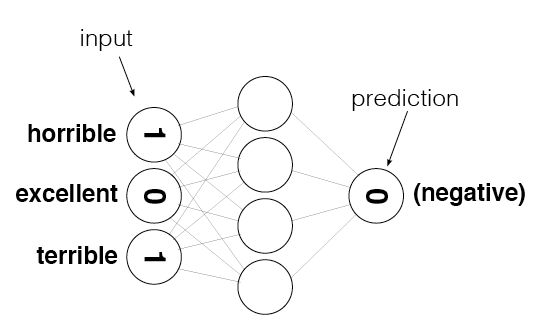

In [17]:
from IPython.display import Image
review = "This was a horrible, terrible movie."
Image(filename='sentiment_network.png')

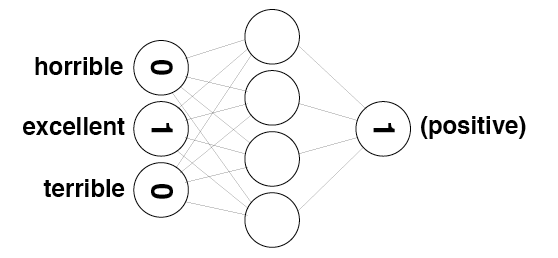

In [18]:
review = "The movie was excellent"
Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [21]:
vocab = set(total_counts.keys())

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [22]:
vocab_size = len(vocab)
print(vocab_size)

74074


**Exercise:** Create a numpy array called `input_tensor` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `input_tensor` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [23]:
"""
TYPE YOUR CODE HERE
"""
inputTensor = np.zeros([1, vocab_size])

Run the following cell. It should display `(1, 74074)`

In [24]:
inputTensor.shape

(1, 74074)

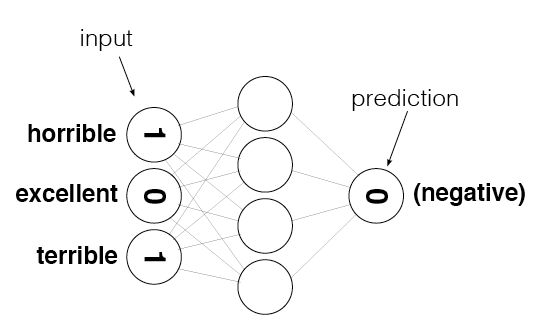

In [36]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`inputTensor` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

## Word2index
We are going to learn about a very powerful technique that gives all the words in our vocabulary a unique feature representation. Thus, making it actually touchable in a vectorial space. <br>
**Exercise:** Implement the word2index technique in the following cell. 

In [25]:
"""
IMPLEMENT YOUR CODE HERE
The word2index model usually uses a hash map or a dictionary in python. So, create a dictionary named word2index and assignate
each word an index. For the index assignation you can use the command enumerate. 
"""
# Create a dictionary of words in the vocabulary mapped to index positions 
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'ingenues': 1,
 'watcheable': 2,
 'resnick': 5,
 'hereand': 3,
 'decision': 7,
 'woodworks': 8,
 'stewardesses': 4,
 'citra': 9,
 'dawdling': 10,
 'psychoses': 12,
 'produced': 13,
 'blockhead': 14,
 'charcoal': 16,
 'transcend': 17,
 'crighton': 19,
 'elsewhere': 20,
 'lopped': 6,
 'jewellers': 49389,
 'potholder': 23,
 'disseminated': 24,
 'vocalizing': 24606,
 'stubbornly': 26,
 'klowns': 27,
 'anc': 24607,
 'consults': 54910,
 'stir': 29,
 'interred': 31,
 'pons': 32,
 'irwin': 35,
 'octavian': 37,
 'duchonvey': 61674,
 'hugues': 39,
 'automatically': 49393,
 'ludvig': 40,
 'nudity': 41,
 'gelf': 44,
 'gene': 45,
 'lesbo': 46,
 'plusthe': 48,
 'sloane': 71851,
 'winston': 12332,
 'ozma': 49,
 'badham': 37070,
 'qv': 50,
 'admiration': 61677,
 'mareno': 51,
 'decade': 52,
 'greystoke': 53,
 'nose': 54,
 'rings': 11,
 'sixty': 55,
 'telescopes': 56,
 'other': 57,
 'samurai': 37077,
 'twinkies': 58,
 'literates': 24613,
 'collectibles': 61,
 'filmfour': 60,
 'muddy': 62,
 'br

### Transform your labels
Now we are going to one-hot encode the labels of the dataset. Remember the model only knows about numbers, so human concept strings don't make any sense.  
**Exercise:** Create a function that maps each of the literal labels to a sparse vector that has the shape of the number of classes.

In [26]:
"""
IMPLEMENT YOUR CODE HERE
One hot encode the labels of the dataset
"""
def transformLabels(labels):
    transformedLabels = []
    for each in labels:
        to_append = 1 if each == 'POSITIVE' else 0
        transformedLabels.append(to_append)
    return transformedLabels

# Run your code to see if you got it right
new_labels = transformLabels(labels)
print(new_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [28]:
labels[1], new_labels[1]

('NEGATIVE', 0)

# Project 3: Preprocessing the data
With the preprocessed data we can finally start working on a learning model. <br> Size of the dataset:

In [29]:
len(reviews), len(labels)

(25000, 25000)

Let's take a look at how we split words in each review

In [30]:
words = [each for each in reviews[0].split(" ")]
print(words, labels[0])

['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', '.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', '', 'such', 'as', '', 'teachers', '', '.', 'my', '', '', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', 'high', '', 's', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '', 'teachers', '', '.', 'the', 'scramble', 'to', 'survive', 'financially', '', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', '', 'pomp', '', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', '', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', '.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', '', 'i', 'immediately', 'recalled', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'at', '.', '.', '.', '.', '.', '.

In [31]:
print(words[0], word2index[words[0]])

bromwell 69154


In [32]:
pos_neg_ratios[words[0]]

0

### Clean reviews
We have to get rid of the words that cause noise in our dataset. 

In [33]:
print(vocab)

{'', 'ingenues', 'watcheable', 'hereand', 'stewardesses', 'resnick', 'lopped', 'decision', 'woodworks', 'citra', 'dawdling', 'rings', 'psychoses', 'produced', 'blockhead', 'broiling', 'charcoal', 'transcend', 'disinvite', 'crighton', 'elsewhere', 'cosgrove', 'probalby', 'potholder', 'disseminated', 'ffwd', 'stubbornly', 'klowns', 'katsopolis', 'stir', 'brain', 'interred', 'pons', 'durability', 'zeffirelli', 'irwin', 'jamestown', 'octavian', 'jin', 'hugues', 'ludvig', 'nudity', 'intending', 'disapprovement', 'gelf', 'gene', 'lesbo', 'lovey', 'plusthe', 'ozma', 'qv', 'mareno', 'decade', 'greystoke', 'nose', 'sixty', 'telescopes', 'other', 'twinkies', 'calvero', 'filmfour', 'collectibles', 'muddy', 'classical', 'afflictions', 'marvellous', 'enlivenes', 'gatling', 'vaporized', 'nota', 'occupy', 'mache', 'keeling', 'jeep', 'ghoststory', 'greensward', 'intro', 'eglimata', 'orbital', 'pish', 'cay', 'mists', 'theda', 'deviants', 'peek', 'lat', 'zuniga', 'cling', 'argyll', 'comensurate', 'noli'

In [115]:
# Check the ratios for the words in our vocabulary
for word in vocab:
    print(pos_neg_ratios[word])

-0.0197770515835
0
0
0
0
0
0
-0.250051004234
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.389464766762
0
0
0
0
0
0
0
0
0
0
0.610670958736
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.766172315575
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.252280145401
-1.72910850427
0
0
0
0
0
0
0
0
0
0
0
0
0.0953101798043
0
0
0
0
0
-0.726372828188
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.17233299891
0
0
0
0
0
0
0
0
0.0459217505856
0
0
0
0
0
0
0
0.659994973243
0
0
0
0.172612742667
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.31078680861
0
0
0
0
0
0
0
0
0
0
0
0
0
0.440867035159
0
0
0
0
0
0
0
0
0
0.277502504238
0
0.114775514592
0
0
0
0
0
0
0
0
0.452348694007
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.69314718056
0
0
0
0
0
0
0
0
0.240335951855
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.12783337151
-0.729961153683
0
0
0
0
0
0
0
0
0
0
0
0
0
0.491120552687
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0.440922419945
0
-2.30757263451
0
0
0
0
0
0
1.04380405217
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.158224005215
0
0
0
0
0
0
0
0
0
0
0
-0.116799267746
0
0
0
0
0
0
0
-0.0108185026381
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.341303163891
0
0
0
0
0
0
0
0
-0.739667196195
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.283126255916
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.317454230785
0
0
0
0
0
0.228439238889
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.426518517306
0
0
0
0
0
0
0
0
-0.299154473614
0
0
0
0
0
-0.388935806157
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.311917952561
0.909675492755
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.481838086893
0
0
0
0
-0.263269846797
-0.181217194451
-0.294799540221
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.58467335481
0
0
0
-0.83324351518
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.40229470247
0
0
0
0
0
0
0
0
0
0
0.578484272

0
0
0.121360857004
0
0
0
-0.295845383091
0
0
0
0
0
0
0
0
0
0
0.0672369447847
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.489385292528
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.536801110169
0
0
0
0
0
0
0
0
0
1.02410976137
0
0
0
0
0
0
0
0
0.888891757686
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.526093095897
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.305897512343
0
0
0
0
0
0
0
0
0
0
0
0
0.0281708769667
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.916290731874
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0176995770994
0
0
0
0
0
0
0
0
0
0
0
0
-0.229574441645
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0321225474
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.18786173717
0
0
0
0
0
0
0
0
0
0
0
0.559615787935
0
0
0.375612144958
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.1771876988
0
0
0
0
0
0
0
0
0
0.346624608085
0
0
0
0
-0.540384426008
0
0
0
0
-0.47692407209
0
0
0
0


0
0
0
0
0
0
0
0
0
0
-0.149212398187
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0518250678646
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.197771302303
0
0
0
0
0
0
0
0
0
0
0
0
-0.0197374828383
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.293102139921
0
0
0
0
0
0.073122264829
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.118038430882
0
0.710241613919
0
0
0
0.0350913198113
0
0
0
0
0.10178269431
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0162605208718
0
0
0.0532985817244
0
-0.196027622698
0
0
0
0
0
0
0
0
0.355203273327
0
0
0
0
0
0
0
0
0
0
0
0
-0.118362175071
0
0
-0.355275363584
0
-1.34963037675
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.541242851359
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.411814335787
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.167939494932
0
0
0
-0.131769277631
0
0
0
0
0
0
0
-0.160843347486
0
0
0
0
0
0.284251537355
0
0
0
0
0
-0.253195896381
0.497145519862
0
0
0
0
0.323021438897
0
0
0
0
0
0
0


0
0
0
0
-3.25809653802
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.041720998579
0
0
0
0.304799915969
0
0
0
0
0
0
0
0
0.930818832437
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.526543039661
0
0
0
0
0
0
0
0
0
0
0
0
-0.0657050730489
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.282232467684
0.100083458557
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.104140259253
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0479463146314
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.228841572429
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.179971379449
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.126040720895
0.199489360416
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.439278472474
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.666478933478
0
0
0
0
0
0
0
0
0
0
0
-0.964777544001
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.467808238682
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0.164549387048
-0.0243914531242
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.215831335693
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.409675640645
0
0
0
0
0
0
0
0
0
0.00995033085317
0
0
0
0
0
1.26689562979
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.130361817863
0
0
0
0
0
0.509005787049
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.234193387501
-0.176279242338
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0184167267862
0
0
0
0
0
0
0
0
0
0
0
0
-0.69314718056
0
0
-0.0448953199079
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.295117050939
0
0
0
-0.0966268356891
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0979804083602
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.318880443308
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.800119300112
0
0.192283549523
0
0
0
0
0
0
0
0
0
0
-0.108802859849
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0775582343459
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.115069329785
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.996829594358
0
0
-0.348570442127
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.226124179452
0
0
0
0
0.342741849635
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.133531392625
0
0
0
0
0
0
0
0
0
0
0
0
0
0.165079750359
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.12405264867
0
0
0
-0.502793452069
0
0
0
0
0
0
0
0
0.216671036809
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.513261678564
-1.39551101622
0
0
0
0
0
-0.0256424306133
0
0
0
0.767870726756
-1.44036158239
0
0
0
0
0
0
-0.373513508302
0
0
0
0
0
0
0
0
0
0
-0.646627164925
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.427444014827
0
0
0
0
0
0
0
0
0
0
-0.0571584138399
0
0
0
0
0
0
0
-0.179585576975
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.230848597689
0
0
0
0
0
0
0
0
0
0
0
0
0
0.518562606268
0
0
0
0
0
-0.603916046832
0.0449513878623
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

0
-0.594707107747
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.371247150798
-0.610909082323
0
-0.304340958438
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.17865499634
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.538996500733
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0397403286495
0
0
0
0
0
0
0
0
0
0
-0.585656414553
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.664976303593
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.585258218549
0
0
0
0
0
0.738403772148
0
0.459532329378
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.181179352215
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.34258992689
0
0
0
0
0
0.128254335524
0
0
0
0
0


0
0
0
0
0
0.203912189386
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.13773074965
0
0.169602784386
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.310719740519
0
0
0
0
-0.73826761584
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.510825623766
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.731043551299
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.645744941665
0
0
0
0
0
0
0
0
0
0
0
0
0
0.365513057096
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.613104472886
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.407860318834
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.704575876384
0.342944751127
0
0
0
0.0652405218684
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.304723538307
0
0
0
0
0
0
0
0
0
0
0
0
0.132644474606
0
0
0
0
0
0
0.062800901239
0
0
0.595773016535
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.372404245847
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.510825623766
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.804938586548
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0571584138399
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.498991166119
0
0
0
0
0.542324290825
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.149143158097
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.395845444946
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.429332589515
0
0
0
0
0
0
0
0
0
0
0
0
0.120952610418
0
0
0
0
0
0
-0.524524468124
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.686955210312
0
0
0
-0.105360515658
0
0
0
0
0
0.225879531133
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.108802859849
0
0
0
0
0
0
-0.666191370571
0
0
0
-0.606490854169
0
0
0
0
0
0
0.423483613611
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.101308198453
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.239672853265
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.2527629685
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0.724399724064
0
0
0
-0.516006982508
0
0
0
0
0
0
0
0
0
0.214136245459
0
0
0
0
0
0
0
0
0
0.512658804848
0
-0.146603474192
0
0.130620182417
0
0
0
0
0
0
0.330241686871
0
0.260793172235
0
0
0
0
0
0
0
0
0
0.701445983375
0
0
0
0
0
0
0
0
0
0
0
-0.189638274659
0
0.478035800943
0
0
0
0
0.226773319365
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0524901826214
0
0
0.19189100781
0
0
0
0
0.581229264356
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0855221734382
0
0.952784790305
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.17480272438
0
0
0
0
0
0
0
-0.633723760089
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.673729094703
0
0
0
0
0
0
0
0
0.741003201738
0.270874954135
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.774304094477
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0984400728133
0
0
0
0
0
0.0294138852063
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.358633808424
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.264441108412
0
0
0
0
0
0
0
0
0
0
0
0
0
1.38629436112

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.101610176411
0
0.055059777183
0.0584962066816
0
0
0
-1.33977434548
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0730251350149
0
0.537142932083
0
-0.246947609115
-0.115831815525
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.161969327945
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.461818044659
0
0
0
0
0
0
0
0
0
0
0
0
0.0663431244516
0
0
-0.119959315079
0
0
-0.0807484761287
0
0
0
0
0
0
0
0
0
0
0
0
0
0.299516530099
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.155292884406
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.149940147291
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0899482366629
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.376099213304
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.142420340042
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.676340062244
0
0
0
0
0.831733343846
0
0
0
0
0
0
0
0

0
0
0
0
0
0
0
0
-0.364357440111
0
0
0
0
0
0
0
0
0
0
0
0
1.24674248071
0
0
0
0
-0.604419064951
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.80437281567
0
0
0
0
-0.338975366839
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.392278103826
0
0
0
0
0
0
0
0.615945146532
0
0
0
0
0.395059186947
0
0
0
0
0
0
0
0
0
0
0
0
-0.208544751893
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.12134053975
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.600773860429
0
0
0
0
0
0
0
0
0.214409871345
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.154150679827
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.28271928311
0
0
0.222061885443
0
0
0
0
0
0
0.325422400435
0
0
0
0
0
0
0.455002475793
0
0
0
0.079552631702
0
0
0
0
0
0
0
0
0
0
-0.411618973683
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.380205441349
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.121466281073
0.212174519944
0
0.318200872916
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.659624488521
0
0


0
0
0
0
0
0
0
0
0
0
0
0
1.13251384034
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.109199291965
0.14141165405
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.978326122794
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-2.36085400112
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.111917916204
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.79492987487
0
0
0
0
0
0
0.0
0
0
0.537733076686
0
0
0
0
0
0
0
0
0
0
-0.158605030177
-0.160930366813
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.21622310847
0
0
0.413046645561
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.375251329512
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.304211374403
0
0
0
0
0.510825623766
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.670674324708
0
0
-0.568693006087
0
0
0
0
0
0
0
-0.662749703376
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0.267320951721
0
0
0
0
0
0
0
0
0
-0.0825865910093
0
0
0
0
0
0
0
0
0
0
0
0
0.651236284944
0
0
0
0
0
0
0
-0.0330062

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.361613225579
0
0
0
0
0
0
0
0
0.594707107747
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.467985465089
0
0
0
0
0
0
0
-0.174522864308
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.145182009844
0.395708933163
0
0
0
0
0
0
0
0
0
0
0
0
0.563689113323
0
0
0
0
0
1.60943791243
0
0
0
0
0
0
0
-0.231111720963
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0461620417632
0
0
0
-0.0352620119684
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.379104438417
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.89974810729
0
0
-0.236388778064
0
0
0
0
0
0
0.47198579045
0
0
0
0
0
0
0
0
0
0
0
0.767255152714
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.203109492281
0
0
0
0
0
0
0
0
0.112795494145
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.17151064069
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.175204089025
0
0
0
0
0
0
-1.12601126286
0


0
0
0
0
0
0
0
-0.058198239243
0
0
0
0
0
0
0
0
0
0
0
0
0.622111407443
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.214656937437
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0775582343459
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.955511445027
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.11515491325
0
-0.127155175485
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.105043179
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.115436167647
0
0
-0.0903840614683
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0807210931422
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00278164296188
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


-0.701730924251
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0791373205587
0
0
0
0
0
0
0
0
0
0
0
0.806087591741
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.559615787935
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.104223505871
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0901510969943
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0763729787846
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0998453349697
0
0
0
0
-0.259511195485
0
0
0
0
0
0
0
0
0.245122458033
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0480092191864
0
-0.071593653187
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0173314563516
0
0
0
0
0
0
0
0
0
0
0.540567592965
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0194416816146
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0444517625708
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.194424578965
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.328504066972
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.249460859632
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.462623521948
0
0
0
0
0
0
0
0
-0.233614851182
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.56776521603
0
0
0.107630664192
0
0
0
0
0.484602428667
0
0
0.657429097958
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.650587566141
0
0
0
-0.392806711236
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.438254930931
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.361979996168
0
0
0
0.906486731778
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.688463331248
0.145182009844
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.493170688527
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0121213605323
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.405465108108
0
0
-0.179501

0
0
0
0
0
0
0
0
0
0
0
0.808216510345
0
0
0
0
0
0
0
0
0
0
0.275975671168
0.44610275384
-0.619039208406
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.01898101898
0
0
0
0
0
0
0
0.253195896381
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.237958637099
0
0
0
0
-0.854634650451
0
0
0
-0.0243914531242
0
0
0
0
0
0
0.19189100781
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.495787746401
0
0
0
0
0
0
0
0
0
0
-0.175204089025
0
0
0
0
0
0
0
0
0
0.996829594358
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.02450431651
0
0
0.0419765624072
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.363965377201
0
0
0
0
0
0
0
0
0
0
0
-0.89014545177
0
0
0
0
0
0
0
0
0
0
0
0
0
0.555747311158
0
0
0
0
0
0
0
0
0
0.023438572972
0
0
0
0
0
0
0
0
0
0
0
0
0
-1.4201959128
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0885936558008
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0766926207883
-0.0487901641694
0
0
0
0
0
0
0.533298479618
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.212561441984
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0.599118230912
0
0
0
0
0
0
-1.28823314794
0
0.612079357471
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.824175442966
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.315772920608
0
0
0
0
0
0.682297164536
0
0
0
0.0298529631497
0
0
0
0
0
0
0.572265288999
0
0
0
0
0
0
0.916290731874
-0.0588405000229
0
0
0
0
0
0
0
0
0
0
0
0
0
0.400888441081
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.374693449441
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.595508710996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.281463315084
0.287682072452
0
-0.0602073466174
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.338944425767
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0140282861632
0
0
0
0
0
0
0
-0.73923828776
0
0
0
0
-0.161487469891
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.36503153853
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.56454259253
0
0
-0.167634030165
0
0.843429383609
0
0
0
0
0
0
0
0
-0.3701457439

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0953101798043
0
0
0
0
0
0
-0.283768173131
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0758362623836
0
0
0
0
0
-0.376779960109
0
0
0
0
0
0
0
0
0
-0.610487274872
0
0
0.138150338481
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.381934610698
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.649344557902
0
0
0
0
-0.156004248477
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.365113812585
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.131028262406
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.226871737297
0
0
-0.0581416290326
0
0
0
0
0
0.429562659687
0
0
-0.683294884117
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.984498981901
0
-0.0311713549029
0
0
0
0
0
0.170957798144
0
0
0
0
0
0
0
-0.543086485984
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.397860508723
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

0
0
0
0
0
0
0
0
0
0
0.319353416289
0
0.498372162695
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.413975797776
0
0
0
0.968737207247
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.385554948149
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0625203569813
0.121607132095
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0921704597997
0
0
0
0.154150679827
0
0
0
0
0
0
0
0
0
0
0.62082651898
0
0
0
0
0
0.0317486983146
0
0
0
0
0.0787808778531
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.165514438478
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.131924472266
0
0
0
0
0
0
0.712565266417
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.143787892792
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.0946652265411
0
0
0
0
0.219500560036
0
0
0
0.0490846716079
0.259511195485
0
0
0
0
0
0
-0.741349282378
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.200670695462
0
0

0.658346651411
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.221682630675
0
0
-0.846673835406
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.05041018685
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.418204133886
0
0
0
0
0
0
0
0
0
0
0
0


### Filter the data
In the predictive theory we have seen that a lot of the words had a neutral polarity since they were equally distributed in both the positive and negative reviews. This means that there is a lot of noise and features that don't really represent correlation between our input and our output. <br> For this reason, our approach is to filter the most unusual words by setting a threshold with the ratios we have calculated before. 

In [36]:
# Size of vocab
print("Size of vocab: ", len(vocab))

allowed_words = []
# Filter the words
for word in vocab:
    if (pos_neg_ratios[word] > -0.5) and (pos_neg_ratios[word] < 0.5):
        pass
    else:
        allowed_words.append(word)

Size of vocab:  74074


In [37]:
print(allowed_words)

['rings', 'brain', 'nudity', 'gene', 'nose', 'mistake', 'cabin', 'drivel', 'lower', 'burns', 'warning', 'damage', 'gradually', 'tight', 'award', 'australia', 'davies', 'daring', 'deserve', 'script', 'fresh', 'best', 'shine', 'throw', 'adapted', 'appalling', 'emotions', 'spy', 'lonely', 'somewhere', 'imdb', 'bugs', 'larger', 'love', 'tells', 'loves', 'classic', 'cheesy', 'doll', 'castle', 'suck', 'downright', 'trio', 'sides', 'sorry', 'washington', 'someone', 'badly', 'brilliantly', 'manhattan', 'superman', 'individual', 'memorable', 'alas', 'mysteries', 'scooby', 'confusing', 'incoherent', 'disappointment', 'beatty', 'slap', 'alien', 'leonard', 'consequences', 'lacks', 'winner', 'generation', 'obnoxious', 'forest', 'approach', 'india', 'miscast', 'fox', 'tap', 'computer', 'bears', 'repetitive', 'segment', 'hoffman', 'musical', 'explicit', 'gentle', 'slightest', 'ripped', 'performed', 'lucy', 'whatsoever', 'ann', 'christian', 'glimpse', 'naked', 'walked', 'outfit', 'brothers', 'brian', 

In [38]:
print(len(allowed_words))

1391


## Create an input tensor
This is how we usually work with a problem like this 

In [39]:
inputTensor = np.zeros((1,len(allowed_words)))
inputTensor.shape

(1, 1391)

## Word2index with the new words
**Exercise:** Implement word2index, again ...

In [40]:
"""
IMPLEMENT YOUR CODE HERE
Create a dictionary of words in the vocabulary mapped to index positions 
* Note on the implementation: copy your previous code
"""
word2index = {}
for i, word in enumerate(allowed_words):
    word2index[word] = i

## Index2word with the new words
**Exercise:** Implement index2word, this is new!

In [41]:
"""
IMPLEMENT YOUR CODE HERE
Create a dictionary of words that uses the index positions and maps them to words 
It is always useful to have an index2word dictionary when working with this technique. Really helpful in debugging
* Note on the implementation: copy your previous code
"""
index2word = {}
for word, index in word2index.items():
    index2word[index] = word

In [44]:
# display the map of words to indices
print("Size word2index: ", len([each for each in word2index.values()]))
print("Size index2word: ", len([each for each in index2word.values()]))
#print("\nExample: ", word2index["hopkins"], index2word[0], "\n\n")
print(word2index)

Size word2index:  1391
Size index2word:  1391
{'timothy': 270, 'lacking': 785, 'ruthless': 629, 'poor': 1352, 'appreciate': 98, 'accents': 705, 'surprises': 271, 'rings': 0, 'keeping': 964, 'breasts': 706, 'incredible': 144, 'britain': 680, 'patrick': 965, 'matches': 145, 'inept': 1130, 'superman': 50, 'bakshi': 820, 'plain': 224, 'trial': 362, 'wonderfully': 314, 'brain': 1, 'jackson': 146, 'loved': 225, 'tend': 272, 'contemporary': 1063, 'blank': 564, 'trash': 99, 'witty': 1307, 'nudity': 2, 'gene': 3, 'proud': 100, 'andrews': 1229, 'daughters': 822, 'advice': 226, 'boxing': 659, 'touched': 743, 'triumph': 660, 'nose': 4, 'wolf': 613, 'ruth': 563, 'job': 481, 'unnecessary': 913, 'dear': 187, 'rough': 1065, 'countries': 788, 'wasted': 523, 'inspired': 1228, 'sunday': 273, 'dialog': 614, 'widow': 274, 'friendship': 399, 'flynn': 789, 'kidding': 1353, 'brave': 315, 'joan': 565, 'basically': 966, 'cant': 316, 'natural': 1374, 'painfully': 1306, 'demon': 363, 'terribly': 1177, 'disgusting

## Let's see our implementation in action
To fulfil our purposes we will need the **.get** function which can be used with dictionaries to get the value of a key. 

In [45]:
reviews[0]
#'life' in reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [47]:
print(word2index.get("great", None))

903


## Fill data (features)
**Exercise:** Create a vector filled with zeros called features that has size [len(reviews), len(allowed_words)]. Then use the dataset (reviews) to fill the feature vector. Remember each word is now a feature and has to be filled respectively. 

In [50]:
"""
IMPLEMENT YOUR CODE HERE
Fill the feature vector. Help will be provided on the class. 
This code might also take a while to compute. 
"""
# Features vector 
features = np.zeros([len(reviews), len(allowed_words)])
print(features.shape)

# Iterate over the reviews
for i in range(len(reviews)):
    # Select specific review
    review = reviews[i]
    # Create a list of words that use their index in word2index
    indexes = [word2index.get(word, None) for word in review.split(" ")]
    # Fill sparse vector
    for index in indexes:
        if index != None:
            #print(index)
            features[i,index] = 1
    # Some output
    print("Sample number: {}".format(i))
    #print(features[i,:])

# Run this to make sure you are doing fine
print("Output at 338: ", features[0,338])
print("Output at 1897: ", features[0,1897])
print("Output at 258: ", features[0,258])
print("Output at 1135: ", features[0,1135])
print("Output at 501: ", features[0,501])
print("Output at 1735: ", features[0,1735])
print("Total sum should be 6: ", np.sum(features[0,:]))

(25000, 1391)
Sample number: 0
Sample number: 1
Sample number: 2
Sample number: 3
Sample number: 4
Sample number: 5
Sample number: 6
Sample number: 7
Sample number: 8
Sample number: 9
Sample number: 10
Sample number: 11
Sample number: 12
Sample number: 13
Sample number: 14
Sample number: 15
Sample number: 16
Sample number: 17
Sample number: 18
Sample number: 19
Sample number: 20
Sample number: 21
Sample number: 22
Sample number: 23
Sample number: 24
Sample number: 25
Sample number: 26
Sample number: 27
Sample number: 28
Sample number: 29
Sample number: 30
Sample number: 31
Sample number: 32
Sample number: 33
Sample number: 34
Sample number: 35
Sample number: 36
Sample number: 37
Sample number: 38
Sample number: 39
Sample number: 40
Sample number: 41
Sample number: 42
Sample number: 43
Sample number: 44
Sample number: 45
Sample number: 46
Sample number: 47
Sample number: 48
Sample number: 49
Sample number: 50
Sample number: 51
Sample number: 52
Sample number: 53
Sample number: 54
Sample

Sample number: 736
Sample number: 737
Sample number: 738
Sample number: 739
Sample number: 740
Sample number: 741
Sample number: 742
Sample number: 743
Sample number: 744
Sample number: 745
Sample number: 746
Sample number: 747
Sample number: 748
Sample number: 749
Sample number: 750
Sample number: 751
Sample number: 752
Sample number: 753
Sample number: 754
Sample number: 755
Sample number: 756
Sample number: 757
Sample number: 758
Sample number: 759
Sample number: 760
Sample number: 761
Sample number: 762
Sample number: 763
Sample number: 764
Sample number: 765
Sample number: 766
Sample number: 767
Sample number: 768
Sample number: 769
Sample number: 770
Sample number: 771
Sample number: 772
Sample number: 773
Sample number: 774
Sample number: 775
Sample number: 776
Sample number: 777
Sample number: 778
Sample number: 779
Sample number: 780
Sample number: 781
Sample number: 782
Sample number: 783
Sample number: 784
Sample number: 785
Sample number: 786
Sample number: 787
Sample numbe

Sample number: 1737
Sample number: 1738
Sample number: 1739
Sample number: 1740
Sample number: 1741
Sample number: 1742
Sample number: 1743
Sample number: 1744
Sample number: 1745
Sample number: 1746
Sample number: 1747
Sample number: 1748
Sample number: 1749
Sample number: 1750
Sample number: 1751
Sample number: 1752
Sample number: 1753
Sample number: 1754
Sample number: 1755
Sample number: 1756
Sample number: 1757
Sample number: 1758
Sample number: 1759
Sample number: 1760
Sample number: 1761
Sample number: 1762
Sample number: 1763
Sample number: 1764
Sample number: 1765
Sample number: 1766
Sample number: 1767
Sample number: 1768
Sample number: 1769
Sample number: 1770
Sample number: 1771
Sample number: 1772
Sample number: 1773
Sample number: 1774
Sample number: 1775
Sample number: 1776
Sample number: 1777
Sample number: 1778
Sample number: 1779
Sample number: 1780
Sample number: 1781
Sample number: 1782
Sample number: 1783
Sample number: 1784
Sample number: 1785
Sample number: 1786


Sample number: 2659
Sample number: 2660
Sample number: 2661
Sample number: 2662
Sample number: 2663
Sample number: 2664
Sample number: 2665
Sample number: 2666
Sample number: 2667
Sample number: 2668
Sample number: 2669
Sample number: 2670
Sample number: 2671
Sample number: 2672
Sample number: 2673
Sample number: 2674
Sample number: 2675
Sample number: 2676
Sample number: 2677
Sample number: 2678
Sample number: 2679
Sample number: 2680
Sample number: 2681
Sample number: 2682
Sample number: 2683
Sample number: 2684
Sample number: 2685
Sample number: 2686
Sample number: 2687
Sample number: 2688
Sample number: 2689
Sample number: 2690
Sample number: 2691
Sample number: 2692
Sample number: 2693
Sample number: 2694
Sample number: 2695
Sample number: 2696
Sample number: 2697
Sample number: 2698
Sample number: 2699
Sample number: 2700
Sample number: 2701
Sample number: 2702
Sample number: 2703
Sample number: 2704
Sample number: 2705
Sample number: 2706
Sample number: 2707
Sample number: 2708


Sample number: 3694
Sample number: 3695
Sample number: 3696
Sample number: 3697
Sample number: 3698
Sample number: 3699
Sample number: 3700
Sample number: 3701
Sample number: 3702
Sample number: 3703
Sample number: 3704
Sample number: 3705
Sample number: 3706
Sample number: 3707
Sample number: 3708
Sample number: 3709
Sample number: 3710
Sample number: 3711
Sample number: 3712
Sample number: 3713
Sample number: 3714
Sample number: 3715
Sample number: 3716
Sample number: 3717
Sample number: 3718
Sample number: 3719
Sample number: 3720
Sample number: 3721
Sample number: 3722
Sample number: 3723
Sample number: 3724
Sample number: 3725
Sample number: 3726
Sample number: 3727
Sample number: 3728
Sample number: 3729
Sample number: 3730
Sample number: 3731
Sample number: 3732
Sample number: 3733
Sample number: 3734
Sample number: 3735
Sample number: 3736
Sample number: 3737
Sample number: 3738
Sample number: 3739
Sample number: 3740
Sample number: 3741
Sample number: 3742
Sample number: 3743


Sample number: 4710
Sample number: 4711
Sample number: 4712
Sample number: 4713
Sample number: 4714
Sample number: 4715
Sample number: 4716
Sample number: 4717
Sample number: 4718
Sample number: 4719
Sample number: 4720
Sample number: 4721
Sample number: 4722
Sample number: 4723
Sample number: 4724
Sample number: 4725
Sample number: 4726
Sample number: 4727
Sample number: 4728
Sample number: 4729
Sample number: 4730
Sample number: 4731
Sample number: 4732
Sample number: 4733
Sample number: 4734
Sample number: 4735
Sample number: 4736
Sample number: 4737
Sample number: 4738
Sample number: 4739
Sample number: 4740
Sample number: 4741
Sample number: 4742
Sample number: 4743
Sample number: 4744
Sample number: 4745
Sample number: 4746
Sample number: 4747
Sample number: 4748
Sample number: 4749
Sample number: 4750
Sample number: 4751
Sample number: 4752
Sample number: 4753
Sample number: 4754
Sample number: 4755
Sample number: 4756
Sample number: 4757
Sample number: 4758
Sample number: 4759


Sample number: 5776
Sample number: 5777
Sample number: 5778
Sample number: 5779
Sample number: 5780
Sample number: 5781
Sample number: 5782
Sample number: 5783
Sample number: 5784
Sample number: 5785
Sample number: 5786
Sample number: 5787
Sample number: 5788
Sample number: 5789
Sample number: 5790
Sample number: 5791
Sample number: 5792
Sample number: 5793
Sample number: 5794
Sample number: 5795
Sample number: 5796
Sample number: 5797
Sample number: 5798
Sample number: 5799
Sample number: 5800
Sample number: 5801
Sample number: 5802
Sample number: 5803
Sample number: 5804
Sample number: 5805
Sample number: 5806
Sample number: 5807
Sample number: 5808
Sample number: 5809
Sample number: 5810
Sample number: 5811
Sample number: 5812
Sample number: 5813
Sample number: 5814
Sample number: 5815
Sample number: 5816
Sample number: 5817
Sample number: 5818
Sample number: 5819
Sample number: 5820
Sample number: 5821
Sample number: 5822
Sample number: 5823
Sample number: 5824
Sample number: 5825


Sample number: 6687
Sample number: 6688
Sample number: 6689
Sample number: 6690
Sample number: 6691
Sample number: 6692
Sample number: 6693
Sample number: 6694
Sample number: 6695
Sample number: 6696
Sample number: 6697
Sample number: 6698
Sample number: 6699
Sample number: 6700
Sample number: 6701
Sample number: 6702
Sample number: 6703
Sample number: 6704
Sample number: 6705
Sample number: 6706
Sample number: 6707
Sample number: 6708
Sample number: 6709
Sample number: 6710
Sample number: 6711
Sample number: 6712
Sample number: 6713
Sample number: 6714
Sample number: 6715
Sample number: 6716
Sample number: 6717
Sample number: 6718
Sample number: 6719
Sample number: 6720
Sample number: 6721
Sample number: 6722
Sample number: 6723
Sample number: 6724
Sample number: 6725
Sample number: 6726
Sample number: 6727
Sample number: 6728
Sample number: 6729
Sample number: 6730
Sample number: 6731
Sample number: 6732
Sample number: 6733
Sample number: 6734
Sample number: 6735
Sample number: 6736


Sample number: 7730
Sample number: 7731
Sample number: 7732
Sample number: 7733
Sample number: 7734
Sample number: 7735
Sample number: 7736
Sample number: 7737
Sample number: 7738
Sample number: 7739
Sample number: 7740
Sample number: 7741
Sample number: 7742
Sample number: 7743
Sample number: 7744
Sample number: 7745
Sample number: 7746
Sample number: 7747
Sample number: 7748
Sample number: 7749
Sample number: 7750
Sample number: 7751
Sample number: 7752
Sample number: 7753
Sample number: 7754
Sample number: 7755
Sample number: 7756
Sample number: 7757
Sample number: 7758
Sample number: 7759
Sample number: 7760
Sample number: 7761
Sample number: 7762
Sample number: 7763
Sample number: 7764
Sample number: 7765
Sample number: 7766
Sample number: 7767
Sample number: 7768
Sample number: 7769
Sample number: 7770
Sample number: 7771
Sample number: 7772
Sample number: 7773
Sample number: 7774
Sample number: 7775
Sample number: 7776
Sample number: 7777
Sample number: 7778
Sample number: 7779


Sample number: 8782
Sample number: 8783
Sample number: 8784
Sample number: 8785
Sample number: 8786
Sample number: 8787
Sample number: 8788
Sample number: 8789
Sample number: 8790
Sample number: 8791
Sample number: 8792
Sample number: 8793
Sample number: 8794
Sample number: 8795
Sample number: 8796
Sample number: 8797
Sample number: 8798
Sample number: 8799
Sample number: 8800
Sample number: 8801
Sample number: 8802
Sample number: 8803
Sample number: 8804
Sample number: 8805
Sample number: 8806
Sample number: 8807
Sample number: 8808
Sample number: 8809
Sample number: 8810
Sample number: 8811
Sample number: 8812
Sample number: 8813
Sample number: 8814
Sample number: 8815
Sample number: 8816
Sample number: 8817
Sample number: 8818
Sample number: 8819
Sample number: 8820
Sample number: 8821
Sample number: 8822
Sample number: 8823
Sample number: 8824
Sample number: 8825
Sample number: 8826
Sample number: 8827
Sample number: 8828
Sample number: 8829
Sample number: 8830
Sample number: 8831


Sample number: 9688
Sample number: 9689
Sample number: 9690
Sample number: 9691
Sample number: 9692
Sample number: 9693
Sample number: 9694
Sample number: 9695
Sample number: 9696
Sample number: 9697
Sample number: 9698
Sample number: 9699
Sample number: 9700
Sample number: 9701
Sample number: 9702
Sample number: 9703
Sample number: 9704
Sample number: 9705
Sample number: 9706
Sample number: 9707
Sample number: 9708
Sample number: 9709
Sample number: 9710
Sample number: 9711
Sample number: 9712
Sample number: 9713
Sample number: 9714
Sample number: 9715
Sample number: 9716
Sample number: 9717
Sample number: 9718
Sample number: 9719
Sample number: 9720
Sample number: 9721
Sample number: 9722
Sample number: 9723
Sample number: 9724
Sample number: 9725
Sample number: 9726
Sample number: 9727
Sample number: 9728
Sample number: 9729
Sample number: 9730
Sample number: 9731
Sample number: 9732
Sample number: 9733
Sample number: 9734
Sample number: 9735
Sample number: 9736
Sample number: 9737


Sample number: 10758
Sample number: 10759
Sample number: 10760
Sample number: 10761
Sample number: 10762
Sample number: 10763
Sample number: 10764
Sample number: 10765
Sample number: 10766
Sample number: 10767
Sample number: 10768
Sample number: 10769
Sample number: 10770
Sample number: 10771
Sample number: 10772
Sample number: 10773
Sample number: 10774
Sample number: 10775
Sample number: 10776
Sample number: 10777
Sample number: 10778
Sample number: 10779
Sample number: 10780
Sample number: 10781
Sample number: 10782
Sample number: 10783
Sample number: 10784
Sample number: 10785
Sample number: 10786
Sample number: 10787
Sample number: 10788
Sample number: 10789
Sample number: 10790
Sample number: 10791
Sample number: 10792
Sample number: 10793
Sample number: 10794
Sample number: 10795
Sample number: 10796
Sample number: 10797
Sample number: 10798
Sample number: 10799
Sample number: 10800
Sample number: 10801
Sample number: 10802
Sample number: 10803
Sample number: 10804
Sample number

Sample number: 11705
Sample number: 11706
Sample number: 11707
Sample number: 11708
Sample number: 11709
Sample number: 11710
Sample number: 11711
Sample number: 11712
Sample number: 11713
Sample number: 11714
Sample number: 11715
Sample number: 11716
Sample number: 11717
Sample number: 11718
Sample number: 11719
Sample number: 11720
Sample number: 11721
Sample number: 11722
Sample number: 11723
Sample number: 11724
Sample number: 11725
Sample number: 11726
Sample number: 11727
Sample number: 11728
Sample number: 11729
Sample number: 11730
Sample number: 11731
Sample number: 11732
Sample number: 11733
Sample number: 11734
Sample number: 11735
Sample number: 11736
Sample number: 11737
Sample number: 11738
Sample number: 11739
Sample number: 11740
Sample number: 11741
Sample number: 11742
Sample number: 11743
Sample number: 11744
Sample number: 11745
Sample number: 11746
Sample number: 11747
Sample number: 11748
Sample number: 11749
Sample number: 11750
Sample number: 11751
Sample number

Sample number: 12686
Sample number: 12687
Sample number: 12688
Sample number: 12689
Sample number: 12690
Sample number: 12691
Sample number: 12692
Sample number: 12693
Sample number: 12694
Sample number: 12695
Sample number: 12696
Sample number: 12697
Sample number: 12698
Sample number: 12699
Sample number: 12700
Sample number: 12701
Sample number: 12702
Sample number: 12703
Sample number: 12704
Sample number: 12705
Sample number: 12706
Sample number: 12707
Sample number: 12708
Sample number: 12709
Sample number: 12710
Sample number: 12711
Sample number: 12712
Sample number: 12713
Sample number: 12714
Sample number: 12715
Sample number: 12716
Sample number: 12717
Sample number: 12718
Sample number: 12719
Sample number: 12720
Sample number: 12721
Sample number: 12722
Sample number: 12723
Sample number: 12724
Sample number: 12725
Sample number: 12726
Sample number: 12727
Sample number: 12728
Sample number: 12729
Sample number: 12730
Sample number: 12731
Sample number: 12732
Sample number

Sample number: 13775
Sample number: 13776
Sample number: 13777
Sample number: 13778
Sample number: 13779
Sample number: 13780
Sample number: 13781
Sample number: 13782
Sample number: 13783
Sample number: 13784
Sample number: 13785
Sample number: 13786
Sample number: 13787
Sample number: 13788
Sample number: 13789
Sample number: 13790
Sample number: 13791
Sample number: 13792
Sample number: 13793
Sample number: 13794
Sample number: 13795
Sample number: 13796
Sample number: 13797
Sample number: 13798
Sample number: 13799
Sample number: 13800
Sample number: 13801
Sample number: 13802
Sample number: 13803
Sample number: 13804
Sample number: 13805
Sample number: 13806
Sample number: 13807
Sample number: 13808
Sample number: 13809
Sample number: 13810
Sample number: 13811
Sample number: 13812
Sample number: 13813
Sample number: 13814
Sample number: 13815
Sample number: 13816
Sample number: 13817
Sample number: 13818
Sample number: 13819
Sample number: 13820
Sample number: 13821
Sample number

Sample number: 14704
Sample number: 14705
Sample number: 14706
Sample number: 14707
Sample number: 14708
Sample number: 14709
Sample number: 14710
Sample number: 14711
Sample number: 14712
Sample number: 14713
Sample number: 14714
Sample number: 14715
Sample number: 14716
Sample number: 14717
Sample number: 14718
Sample number: 14719
Sample number: 14720
Sample number: 14721
Sample number: 14722
Sample number: 14723
Sample number: 14724
Sample number: 14725
Sample number: 14726
Sample number: 14727
Sample number: 14728
Sample number: 14729
Sample number: 14730
Sample number: 14731
Sample number: 14732
Sample number: 14733
Sample number: 14734
Sample number: 14735
Sample number: 14736
Sample number: 14737
Sample number: 14738
Sample number: 14739
Sample number: 14740
Sample number: 14741
Sample number: 14742
Sample number: 14743
Sample number: 14744
Sample number: 14745
Sample number: 14746
Sample number: 14747
Sample number: 14748
Sample number: 14749
Sample number: 14750
Sample number

Sample number: 15658
Sample number: 15659
Sample number: 15660
Sample number: 15661
Sample number: 15662
Sample number: 15663
Sample number: 15664
Sample number: 15665
Sample number: 15666
Sample number: 15667
Sample number: 15668
Sample number: 15669
Sample number: 15670
Sample number: 15671
Sample number: 15672
Sample number: 15673
Sample number: 15674
Sample number: 15675
Sample number: 15676
Sample number: 15677
Sample number: 15678
Sample number: 15679
Sample number: 15680
Sample number: 15681
Sample number: 15682
Sample number: 15683
Sample number: 15684
Sample number: 15685
Sample number: 15686
Sample number: 15687
Sample number: 15688
Sample number: 15689
Sample number: 15690
Sample number: 15691
Sample number: 15692
Sample number: 15693
Sample number: 15694
Sample number: 15695
Sample number: 15696
Sample number: 15697
Sample number: 15698
Sample number: 15699
Sample number: 15700
Sample number: 15701
Sample number: 15702
Sample number: 15703
Sample number: 15704
Sample number

Sample number: 16709
Sample number: 16710
Sample number: 16711
Sample number: 16712
Sample number: 16713
Sample number: 16714
Sample number: 16715
Sample number: 16716
Sample number: 16717
Sample number: 16718
Sample number: 16719
Sample number: 16720
Sample number: 16721
Sample number: 16722
Sample number: 16723
Sample number: 16724
Sample number: 16725
Sample number: 16726
Sample number: 16727
Sample number: 16728
Sample number: 16729
Sample number: 16730
Sample number: 16731
Sample number: 16732
Sample number: 16733
Sample number: 16734
Sample number: 16735
Sample number: 16736
Sample number: 16737
Sample number: 16738
Sample number: 16739
Sample number: 16740
Sample number: 16741
Sample number: 16742
Sample number: 16743
Sample number: 16744
Sample number: 16745
Sample number: 16746
Sample number: 16747
Sample number: 16748
Sample number: 16749
Sample number: 16750
Sample number: 16751
Sample number: 16752
Sample number: 16753
Sample number: 16754
Sample number: 16755
Sample number

Sample number: 17658
Sample number: 17659
Sample number: 17660
Sample number: 17661
Sample number: 17662
Sample number: 17663
Sample number: 17664
Sample number: 17665
Sample number: 17666
Sample number: 17667
Sample number: 17668
Sample number: 17669
Sample number: 17670
Sample number: 17671
Sample number: 17672
Sample number: 17673
Sample number: 17674
Sample number: 17675
Sample number: 17676
Sample number: 17677
Sample number: 17678
Sample number: 17679
Sample number: 17680
Sample number: 17681
Sample number: 17682
Sample number: 17683
Sample number: 17684
Sample number: 17685
Sample number: 17686
Sample number: 17687
Sample number: 17688
Sample number: 17689
Sample number: 17690
Sample number: 17691
Sample number: 17692
Sample number: 17693
Sample number: 17694
Sample number: 17695
Sample number: 17696
Sample number: 17697
Sample number: 17698
Sample number: 17699
Sample number: 17700
Sample number: 17701
Sample number: 17702
Sample number: 17703
Sample number: 17704
Sample number

Sample number: 18709
Sample number: 18710
Sample number: 18711
Sample number: 18712
Sample number: 18713
Sample number: 18714
Sample number: 18715
Sample number: 18716
Sample number: 18717
Sample number: 18718
Sample number: 18719
Sample number: 18720
Sample number: 18721
Sample number: 18722
Sample number: 18723
Sample number: 18724
Sample number: 18725
Sample number: 18726
Sample number: 18727
Sample number: 18728
Sample number: 18729
Sample number: 18730
Sample number: 18731
Sample number: 18732
Sample number: 18733
Sample number: 18734
Sample number: 18735
Sample number: 18736
Sample number: 18737
Sample number: 18738
Sample number: 18739
Sample number: 18740
Sample number: 18741
Sample number: 18742
Sample number: 18743
Sample number: 18744
Sample number: 18745
Sample number: 18746
Sample number: 18747
Sample number: 18748
Sample number: 18749
Sample number: 18750
Sample number: 18751
Sample number: 18752
Sample number: 18753
Sample number: 18754
Sample number: 18755
Sample number

Sample number: 19720
Sample number: 19721
Sample number: 19722
Sample number: 19723
Sample number: 19724
Sample number: 19725
Sample number: 19726
Sample number: 19727
Sample number: 19728
Sample number: 19729
Sample number: 19730
Sample number: 19731
Sample number: 19732
Sample number: 19733
Sample number: 19734
Sample number: 19735
Sample number: 19736
Sample number: 19737
Sample number: 19738
Sample number: 19739
Sample number: 19740
Sample number: 19741
Sample number: 19742
Sample number: 19743
Sample number: 19744
Sample number: 19745
Sample number: 19746
Sample number: 19747
Sample number: 19748
Sample number: 19749
Sample number: 19750
Sample number: 19751
Sample number: 19752
Sample number: 19753
Sample number: 19754
Sample number: 19755
Sample number: 19756
Sample number: 19757
Sample number: 19758
Sample number: 19759
Sample number: 19760
Sample number: 19761
Sample number: 19762
Sample number: 19763
Sample number: 19764
Sample number: 19765
Sample number: 19766
Sample number

Sample number: 20729
Sample number: 20730
Sample number: 20731
Sample number: 20732
Sample number: 20733
Sample number: 20734
Sample number: 20735
Sample number: 20736
Sample number: 20737
Sample number: 20738
Sample number: 20739
Sample number: 20740
Sample number: 20741
Sample number: 20742
Sample number: 20743
Sample number: 20744
Sample number: 20745
Sample number: 20746
Sample number: 20747
Sample number: 20748
Sample number: 20749
Sample number: 20750
Sample number: 20751
Sample number: 20752
Sample number: 20753
Sample number: 20754
Sample number: 20755
Sample number: 20756
Sample number: 20757
Sample number: 20758
Sample number: 20759
Sample number: 20760
Sample number: 20761
Sample number: 20762
Sample number: 20763
Sample number: 20764
Sample number: 20765
Sample number: 20766
Sample number: 20767
Sample number: 20768
Sample number: 20769
Sample number: 20770
Sample number: 20771
Sample number: 20772
Sample number: 20773
Sample number: 20774
Sample number: 20775
Sample number

Sample number: 21739
Sample number: 21740
Sample number: 21741
Sample number: 21742
Sample number: 21743
Sample number: 21744
Sample number: 21745
Sample number: 21746
Sample number: 21747
Sample number: 21748
Sample number: 21749
Sample number: 21750
Sample number: 21751
Sample number: 21752
Sample number: 21753
Sample number: 21754
Sample number: 21755
Sample number: 21756
Sample number: 21757
Sample number: 21758
Sample number: 21759
Sample number: 21760
Sample number: 21761
Sample number: 21762
Sample number: 21763
Sample number: 21764
Sample number: 21765
Sample number: 21766
Sample number: 21767
Sample number: 21768
Sample number: 21769
Sample number: 21770
Sample number: 21771
Sample number: 21772
Sample number: 21773
Sample number: 21774
Sample number: 21775
Sample number: 21776
Sample number: 21777
Sample number: 21778
Sample number: 21779
Sample number: 21780
Sample number: 21781
Sample number: 21782
Sample number: 21783
Sample number: 21784
Sample number: 21785
Sample number

Sample number: 22728
Sample number: 22729
Sample number: 22730
Sample number: 22731
Sample number: 22732
Sample number: 22733
Sample number: 22734
Sample number: 22735
Sample number: 22736
Sample number: 22737
Sample number: 22738
Sample number: 22739
Sample number: 22740
Sample number: 22741
Sample number: 22742
Sample number: 22743
Sample number: 22744
Sample number: 22745
Sample number: 22746
Sample number: 22747
Sample number: 22748
Sample number: 22749
Sample number: 22750
Sample number: 22751
Sample number: 22752
Sample number: 22753
Sample number: 22754
Sample number: 22755
Sample number: 22756
Sample number: 22757
Sample number: 22758
Sample number: 22759
Sample number: 22760
Sample number: 22761
Sample number: 22762
Sample number: 22763
Sample number: 22764
Sample number: 22765
Sample number: 22766
Sample number: 22767
Sample number: 22768
Sample number: 22769
Sample number: 22770
Sample number: 22771
Sample number: 22772
Sample number: 22773
Sample number: 22774
Sample number

Sample number: 23725
Sample number: 23726
Sample number: 23727
Sample number: 23728
Sample number: 23729
Sample number: 23730
Sample number: 23731
Sample number: 23732
Sample number: 23733
Sample number: 23734
Sample number: 23735
Sample number: 23736
Sample number: 23737
Sample number: 23738
Sample number: 23739
Sample number: 23740
Sample number: 23741
Sample number: 23742
Sample number: 23743
Sample number: 23744
Sample number: 23745
Sample number: 23746
Sample number: 23747
Sample number: 23748
Sample number: 23749
Sample number: 23750
Sample number: 23751
Sample number: 23752
Sample number: 23753
Sample number: 23754
Sample number: 23755
Sample number: 23756
Sample number: 23757
Sample number: 23758
Sample number: 23759
Sample number: 23760
Sample number: 23761
Sample number: 23762
Sample number: 23763
Sample number: 23764
Sample number: 23765
Sample number: 23766
Sample number: 23767
Sample number: 23768
Sample number: 23769
Sample number: 23770
Sample number: 23771
Sample number

Sample number: 24849
Sample number: 24850
Sample number: 24851
Sample number: 24852
Sample number: 24853
Sample number: 24854
Sample number: 24855
Sample number: 24856
Sample number: 24857
Sample number: 24858
Sample number: 24859
Sample number: 24860
Sample number: 24861
Sample number: 24862
Sample number: 24863
Sample number: 24864
Sample number: 24865
Sample number: 24866
Sample number: 24867
Sample number: 24868
Sample number: 24869
Sample number: 24870
Sample number: 24871
Sample number: 24872
Sample number: 24873
Sample number: 24874
Sample number: 24875
Sample number: 24876
Sample number: 24877
Sample number: 24878
Sample number: 24879
Sample number: 24880
Sample number: 24881
Sample number: 24882
Sample number: 24883
Sample number: 24884
Sample number: 24885
Sample number: 24886
Sample number: 24887
Sample number: 24888
Sample number: 24889
Sample number: 24890
Sample number: 24891
Sample number: 24892
Sample number: 24893
Sample number: 24894
Sample number: 24895
Sample number

IndexError: index 1897 is out of bounds for axis 1 with size 1391

We finally have completed preprocessing the dataset. Now let's split it. <br>
**Exercise:** use the train/split function to split your dataset [http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation]

In [48]:
# Import model_selection library 
from sklearn.model_selection import train_test_split

In [55]:
"""
IMPLEMENT YOUR CODE HERE
Use the train_test_split function
"""
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    new_labels, 
                                                    test_size=0.2, 
                                                    random_state=0)

# Run this
print(type(y_train))
print("Samples in training set: ", x_train.shape, len(y_train))
print("Samples in test set: ", x_test.shape, len(y_test))

<class 'list'>
Samples in training set:  (20000, 1391) 20000
Samples in test set:  (5000, 1391) 5000


# Project 4: Define a learning model for classification 
Now that we have our data preprocesed we can fit a classification model. 

In [56]:
# Import libraries 

# TREES
from sklearn import tree

# LOGISTIC REGRESSION
from sklearn import linear_model

# RANDOM FORESTS 
from sklearn.ensemble import RandomForestClassifier

# BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# Create our classification model 
def createModel(model = "random_forest"):
    if model == "random_forest":
        return RandomForestClassifier(n_estimators=10)
    elif model == "trees":
        return tree.DecisionTreeClassifier()
    elif model == "bagging":
        return BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
    elif model == "logistic_regression":
        return linear_model.LogisticRegression(fit_intercept = True)
    else:
        return None

In [62]:
# Pick a model 
clf = createModel(model = "logistic_regression")

In [63]:
# Fit our data
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
# Predict outputs
clf.score(x_test, y_test)

0.86719999999999997

## Let's test our model

In [67]:
# Let's get some input
type_something = "Great movie".lower()

# Convert the input to a list
sentence = [word for word in type_something.split(" ")]
print("Sentence: {}".format(sentence))

# Get the index for each word
indexes = [word2index.get(word, None) for word in sentence]
print("Indexes: {}".format(indexes))

# Create a dummy vector
input_ = np.zeros([1, len(allowed_words)])
#print("Size vector: {}".format(input_.shape))

# Fill dummy vector
for index in indexes:
    if index != None:
        input_[0, index] = 1

# Predict our input
print("\n\nSentiment output: ")
prediction = clf.predict(input_)
if prediction[0] == 0:
    print("\t\t\tNEGATIVE")
else:
    print("\t\t\tPOSITIVE")

Sentence: ['great', 'movie']
Indexes: [903, None]


Sentiment output: 
			POSITIVE
